In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [131]:
data = pd.read_csv('data_pivoted.csv')
test_data = pd.read_csv('test.csv')

In [132]:
print(data.shape)
data = data.fillna(0)
test_data = test_data.fillna(0)
test_data.head()


(65, 317)


,abdomen acute,abdominal tenderness,abnormally hard consistency,abortion,abscess bacterial,absences finding,achalasia,agitation,air fluid level,alcohol binge episode,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We need to try both multinomial NB classifier and also binomial classifer. Multinomial classifier is doesn't punish the the non-occurunce of a feature which is a good indicator for a particular disease, whilst Binomial does. 

Not sure which makes more sense in the medical context. 

Need to try both and compare using the right way of doing it (cross validation). Need to read up on evaulating and comparing models. 

Till then will just do a test and train split.

In [162]:
#print(list(data.columns[1:-1]))

In [163]:
str =['abdomen acute', 'abdominal tenderness', 'abnormally hard consistency', 'abortion', 'abscess bacterial', 'absences finding', 'achalasia', 'agitation', 'air fluid level', 'alcohol binge episode', 'ambidexterity', 'angina pectoris', 'anorexia', 'anosmia', 'aphagia', 'apyrexial', 'arthralgia', 'ascites', 'asterixis', 'asthenia', 'ataxia', 'atypia', 'aura', 'bedridden', 'behavior hyperactive', 'blackout', 'bradycardia', 'bradykinesia', 'breakthrough pain', 'breath sounds decreased', 'breech presentation', 'bruit', 'burning sensation', 'cardiomegaly', 'cardiovascular event', 'cardiovascular finding', 'catatonia', 'catching breath', 'charleyhorse', 'chest discomfort', 'chest tightness', 'chill', 'cicatrisation', 'clonus', 'clumsiness', 'colic abdominal', 'consciousness clear', 'constipation', 'cough', 'cushingoid facies', 'cushingoid habitus', 'cyanosis', 'cystic lesion', 'debilitation', 'decompensation', 'decreased body weight', 'diarrhea', 'difficulty', 'difficulty passing urine', 'disequilibrium', 'distended abdomen', 'distress respiratory', 'disturbed family', 'dizziness', 'dizzy spells', 'drool', 'drowsiness', 'dysarthria', 'dysdiadochokinesia', 'dysesthesia', 'dyspnea', 'dyspnea on exertion', 'dysuria', 'ecchymosis', 'egophony', 'emphysematous change', 'energy increased', 'enuresis', 'erythema', 'estrogen use', 'exhaustion', 'extrapyramidal sign', 'extreme exhaustion', 'facial paresis', 'fall', 'fatigability', 'fatigue', 'fear of falling', 'fecaluria', 'feces in rectum', 'feeling hopeless', 'feeling strange', 'feeling suicidal', 'feels hot/feverish', 'fever', 'flare', 'flatulence', 'food intolerance', 'formication', 'frail', 'gasping for breath', 'general discomfort', 'general unsteadiness', 'gravida 0', 'green sputum', 'groggy', 'guaiac positive', 'gurgle', 'haemoptysis', 'haemorrhage', 'hallucinations auditory', 'hallucinations visual', 'has religious belief', 'headache', 'heartburn', 'hematocrit decreased', 'hematuria', 'heme positive', 'hemianopsia homonymous', 'hemiplegia', 'hemodynamically stable', 'hepatosplenomegaly', 'hirsutism', 'history of - blackout', 'hoard', 'hoarseness', 'homelessness', 'hot flush', 'hydropneumothorax', 'hypercapnia', 'hyperemesis', 'hyperhidrosis disorder', 'hyperkalemia', 'hypersomnia', 'hypersomnolence', 'hypertonicity', 'hypoalbuminemia', 'hypokinesia', 'hypometabolism', 'hyponatremia', 'hypotension', 'hypothermia, natural', 'hypotonic', 'hypoxemia', 'immobile', 'impaired cognition', 'intermenstrual heavy bleeding', 'intoxication', 'irritable mood', 'jugular venous distention', 'labored breathing', 'large-for-dates fetus', 'left atrial hypertrophy', 'lesion', 'lethargy', 'lightheadedness', 'lip smacking', 'loose associations', 'low back pain', 'lung nodule', 'malaise', 'mass in breast', 'mass of body structure', 'mediastinal shift', 'mental status changes', 'metastatic lesion', 'moan', 'monoclonal', 'mood depressed', 'moody', 'motor retardation', "Murphy's sign", 'muscle hypotonia', 'muscle twitch', 'myalgia', 'mydriasis', 'myoclonus', 'nasal flaring', 'nausea', 'neck stiffness', 'neologism', 'night sweat', 'nightmare', 'no status change', 'non-productive cough', 'nonsmoker', 'numbness', 'numbness of hand', 'oliguria', 'orthopnea', 'orthostasis', 'out of breath', 'overweight', 'pain', 'pain abdominal', 'pain back', 'pain chest', 'pain neck', 'painful swallowing', 'pallor', 'palpitation', 'panic', 'pansystolic murmur', 'para 1', 'para 2', 'paralyse', 'paraparesis', 'paresis', 'paresthesia', 'passed stones', 'patient non compliance', 'pericardial friction rub', 'phonophobia', 'photophobia', 'pin-point pupils', 'pleuritic pain', 'pneumatouria', 'polydypsia', 'polymyalgia', 'polyuria', 'posturing', 'presence of q wave', 'pressure chest', 'previous pregnancies 2', 'primigravida', 'prodrome', 'productive cough', 'projectile vomiting', 'prostatism', 'proteinemia', 'pruritus', 'pulsus paradoxus', 'pustule', 'qt interval prolonged', 'r wave feature', 'rale', 'rambling speech', 'redness', 'renal angle tenderness', 'retropulsion', 'rhonchus', 'rolling of eyes', 'room spinning', 'satiety early', 'scar tissue', 'scleral icterus', 'sedentary', 'seizure', 'sensory discomfort', 'shooting pain', 'shortness of breath', 'side pain', 'sinus rhythm', 'sleeplessness', 'sleepy', 'slowing of urinary stream', 'sneeze', 'sniffle', 'snore', 'snuffle', 'sore to touch', 'spasm', 'speech slurred', 'spontaneous rupture of membranes', 'sputum purulent', 'st segment depression', 'st segment elevation', "Stahli's line", 'stiffness', 'stool color yellow', 'stridor', 'suicidal', 'superimposition', 'sweat', 'sweating increased', 'swelling', 'symptom aggravating factors', 'syncope', 'systolic ejection murmur', 'systolic murmur', 't wave inverted', 'tachypnea', 'terrify', 'thicken', 'throat sore', 'tinnitus', 'tired', 'titubation', 'tonic seizures', 'transaminitis', 'tremor', 'tremor resting', 'tumor cell invasion', 'unable to concentrate', 'unconscious state', 'uncoordination', 'underweight', 'unhappy', 'unresponsiveness', 'unsteady gait', 'unwell', 'urge incontinence', 'urgency of micturition', 'urinary hesitation', 'verbal auditory hallucinations', 'vertigo', 'vision blurred', 'vomiting', 'weepiness', 'weight gain', 'welt', 'wheelchair bound', 'wheezing', 'withdraw', 'worry']
s=''
for i in str:
    s=s+'"'+i+'",'
    
#print(s)


________
###Experiment 1
- Multinomial NB classifier


In [135]:
print(data.info())
# data.drop(data.ix[data.symptom.isnull()].index,axis=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Columns: 317 entries, disease to yellow sputum
dtypes: float64(316), object(1)
memory usage: 161.1+ KB
None


In [136]:
cols = data.columns.tolist()
cols.remove('disease')
x = data[cols]
xx=test_data[cols]
y = data.disease

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [138]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [139]:
mnb.score(x_test, y_test)

0.0

In [140]:
symptoms =list(xx.columns)
import csv   
#print(symptoms)
patient_symptoms = []
p_s =[]
for i in symptoms:
    if(i in patient_symptoms):
        print("hello ",i)
        p_s.append(1)
    else:
        p_s.append(0)
        
with open('test.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(p_s)
    
test_data = pd.read_csv('test.csv')
test_data = test_data.fillna(0)
xx=test_data[cols]
test_data.head()

,abdomen acute,abdominal tenderness,abnormally hard consistency,abortion,abscess bacterial,absences finding,achalasia,agitation,air fluid level,alcohol binge episode,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Inferences on train and test split
It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

-------
Doing it on the whole set, should the r be 1, and if not, why is it the case, also what r really mean here?


In [141]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x,y)

In [142]:
#print(x.head())
mnb_tot.score(x_test, y_test)

1.0

In [143]:
#print(test_data)

So the model is misclassifying some diseases, which are those dieases?

In [144]:

disease_pred = mnb_tot.predict(xx)

In [145]:
print(disease_pred)
def getname():
    return '445';

['hernia hiatal' 'tricuspid valve insufficiency' 'decubitus ulcer' 'ileus'
 'ileus' 'ileus' 'biliary calculus' 'ileus' 'fibroid tumor'
 'coronary arteriosclerosis' "Alzheimer's disease" 'schizophrenia' 'ileus'
 'coronary arteriosclerosis' 'ileus' 'fibroid tumor' 'fibroid tumor'
 "Alzheimer's disease"]


In [146]:
disease_real = y.values

In [147]:
# for i in range(0, len(disease_real)):
#     if disease_pred[i]!=disease_real[i]:
#         print('Pred: {0} Really:{1}'.format(disease_pred[i], disease_real[i]))

*Inference*: Only one of them is misclassified. TODO: Check why, what are its symtoms.

------
Need a better way of checking the strength of the model. Maybe the paper has some clues to it. 

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

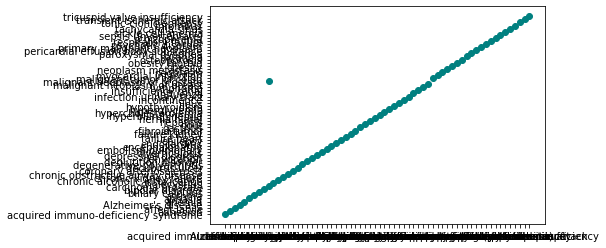

0.9846153846153847

In [154]:
predicted=mnb_tot.predict(x)

#print(predicted)
plt.scatter(predicted, y, color ='teal')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

mnb_tot.score(x, y)
# rmse = np.sqrt(mean_squared_error(y, predicted))
# print('RMSE:')
# print(rmse)


In [155]:
from __future__ import print_function  
# for Python2 compatibility
import numpy 
numpy.random.seed(1337) 
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.datasets import mnist

In [156]:
num_classes = 10

batch_size = 128     
epochs = 30
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [157]:
model = Sequential()

In [158]:

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')

dtr.fit(x,y.index)
predicted = dtr.predict(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 26. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 26. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]


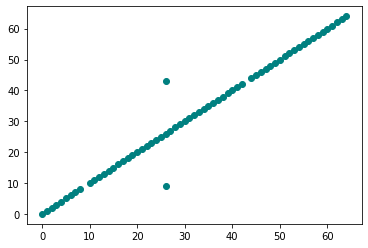

RMSE:
0.29819972656439


In [159]:
print(predicted)
plt.scatter(predicted, y.index, color ='teal')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y.index, predicted))
print('RMSE:')
print(rmse/10)

In [160]:

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x,y.index)

predicted = regr.predict(x)

[-1.25   -3.75    1.4375  4.125   4.75    0.4375  4.8125  6.125  16.25
 -5.875   1.125  17.5    14.0625 13.9375 14.8125 13.5     9.125  10.625
 21.5    25.625  17.0625 20.1875 27.4375 20.0625 22.25   30.9375 23.0625
 20.     24.875  33.125  30.     32.625  33.3125 32.5625 33.6875 39.5
 34.5625 39.9375 36.     42.625  49.25   42.1875 41.125  -5.875  44.375
 52.     45.0625 45.6875 56.375  47.1875 62.875  53.1875 53.8125 59.
 51.5625 62.9375 55.4375 60.1875 53.6875 65.5625 52.     72.25   53.9375
 67.25   64.875 ]


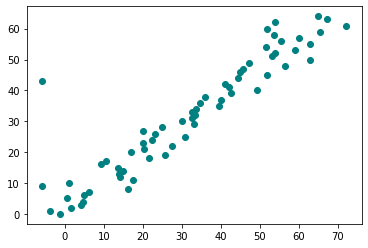

RMSE:
0.7904850324569477


In [161]:
print(predicted)
plt.scatter(predicted, y.index, color ='teal')
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y.index, predicted))
print('RMSE:')
print(rmse/10)
#from firebase import firebase